In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from random import uniform

In [17]:
# PROBLEM 1
# Please follow the link below to view the computational graph
# Forward values
# https://docs.google.com/drawings/d/1uIBFR8uk3-pX_kvtoGBbzFnxD994zQ1gplEC8mWlMbc/edit?usp=sharing

In [18]:
# PROBLEM 2
# Find partial derivatives of function 𝑓(𝑥, 𝑦, 𝑧) as defined in the first problem, with respect to x, y and z by using tf. GradientTape()
# Initialize tensorflow variables
x = tf.Variable(-1.0)
y = tf.Variable(2.0)
z = tf.Variable(3.0)

# Use GradientTape context manager
with tf.GradientTape(persistent=True) as t1:
    # Watch all three variables in the function
    t1.watch(x)
    t1.watch(y)
    t1.watch(z)
    # Define function
    f = x/y + z**2 + x
# Get gradients of the defined function with respect to each variable
df_dx = t1.gradient(f, x)
df_dy = t1.gradient(f, y)
df_dz = t1.gradient(f, z)
# Print out results
print('Partial Derivatives of f with respect to...')
print(f'x is: {df_dx.numpy()}')
print(f'y is: {df_dy.numpy()}')
print(f'z is: {df_dz.numpy()}')

Partial Derivatives of f with respect to...
x is: 1.5
y is: 0.25
z is: 6.0


In [24]:
# PROBLEM 3
# Please follow the link below to view the computational graph
# https://docs.google.com/drawings/d/1V_aLl27eEEYoEIiEEkZIst6t6aeQFKcAdMAn5VKRljA/edit?usp=sharing

# Initialize tensorflow variables
x = tf.Variable(2.0)
y = tf.Variable(-1.0)

from math import e
def sigmoid(q):
    '''Standard sigmoid function.'''
    return 1/(1+e**-q)

# Use GradientTape context manager
with tf.GradientTape(persistent=True) as t2:
    # Watch the two variables in the function
    t2.watch(x)
    t2.watch(y)
    # Defin the function
    f = (x + sigmoid(-y))
    # f = (x + sigmoid(-y)) / (y**2)
# Get gradients of the defined function with respect to each variable
df_dx = t2.gradient(f, x)
df_dy = t2.gradient(f, y)
# Print out results
print('Partial Derivatives of f with respect to...')
print(f'x is: {df_dx.numpy()}')
print(f'y is: {df_dy.numpy()}')

Partial Derivatives of f with respect to...
y is: -0.1966119259595871


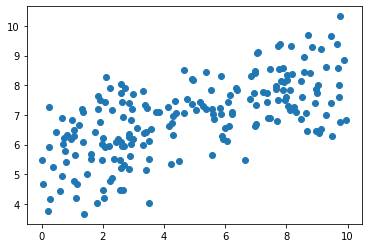

In [11]:
# PROBLEM 4
# Create a set of 200 datapoints
# Use numpy to sample from the uniform distribution beween 0 and 10
low = 0
high = 10
num_data_points = 200
X = np.random.default_rng().uniform(low,high,num_data_points)
# Calcuate raw y values
y_raw = 0.3*X + 2
# Get the mean of those y values
y_raw_mean = np.mean(y_raw)
# Generate gaussian noise with 1 standard deviation of the mean, using the mean of the y_raw values
noise = np.random.normal(y_raw_mean,1,num_data_points)
# Add the noise to the raw y values to get the y values
y = y_raw + noise
# Plot x vs y
plt.scatter(X,y)

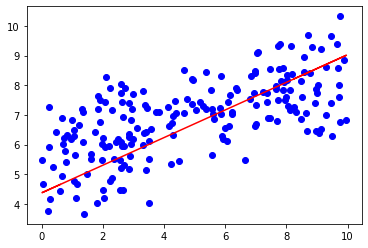

In [12]:
# Initialize m (slope) and b (y intercept) as the midpoint between the low and high
# Use the variable data structure, as these values will be updated throughout the learning step
mid = float((low + high) / 2)
m = tf.Variable(mid)
b = tf.Variable(mid)
# Initialize a learning rate and number of epochs
learning_rate = 0.001
epochs = 100
# Set verbose to True for printed output
verbose = False

def mse(y_true, y_pred):
    '''Function for calculating the mean squared error. This is a metric for regression problems. It takes in the predicted 
    y and true y then calculates and returns the mean square of their difference.'''
    return tf.reduce_mean(tf.square(y_true - y_pred))

def predict(m, X, b):
    '''Function for predicting the y value of a line, using the standard y=mx+b formula.'''
    return tf.add(tf.multiply(m, X), b)

def learn(X, y, learning_rate):
    '''Function that calculates gradients of m and b values, then updates them according to the learning rate.
    This uses GradientTape from tensorflow to calculate the gradient based on the mse of the y values.'''
    with tf.GradientTape(persistent=True) as t3:
        t3.watch(m)
        t3.watch(b)
        loss = mse(y, predict(m, X, b))
        if verbose:
            print(f'Loss: {loss}')

    # Get the gradients for m and b
    dy_dm = t3.gradient(loss, m)
    dy_db = t3.gradient(loss, b)
    # Nudge them by the learning rate
    m.assign_sub(dy_dm * learning_rate)
    b.assign_sub(dy_db * learning_rate)


def train(X, y, learning_rate, epochs):
    '''Function for calculating the optimal values for the variables m and b, over a set number of epochs. Returns
    numpy values.'''    
    for i in range(epochs):
        # At each epoch, make a change based on the feedback in the learn function
        learn(X, y, learning_rate)
        if verbose:
            print("Epoch: ", i)
    return np.mean(m.numpy()), np.mean(b.numpy())

# Get predicted m and b values
m_pred, b_pred = train(X, y, learning_rate, epochs)
# Initialize matplotlib scatterplot with x and y values
fig, ax = plt.subplots()
ax.scatter(X, y, c="blue")
# Add best fit line based on predicted m and b values
best_fit_line_values = [m_pred * i + b_pred for i in X]
# Plot
ax.plot(X, best_fit_line_values, c='red')
# Looks pretty good!